<center>
<img src="qq.png" width="50%" align="center">
    </td></tr>

# Interacción de un sistema con un entorno

Si tenemos un sistema en el estado $\rho_s$, el cual esta acoplado a un entorno $\rho_e$, el sistema completo evolucionará según la transformación unitaria $U$. Si suponemos que el estado inicial del sistema es: $$\rho(0)=\rho_s\otimes\rho_e$$

Luego de la evolución, el entorno ya no interactuará con el sistema y por lo tanto el sistema final es descrito por una traza parcial sobre la evolución del sistema completo:
$$\epsilon(\rho)=\mathrm{Tr_e}[U\rho_s\otimes\rho_e U^{\dagger}]$$

$$\epsilon(\rho)=\sum_k \langle e_k| U[\rho_s\otimes |e_0\rangle\langle e_0|] U^{\dagger} |e_k\rangle$$

$$\epsilon(\rho)=\sum_k \langle e_k| U |e_0\rangle\rho_s\langle e_0| U^{\dagger} |e_k\rangle$$

$$\epsilon(\rho)=\sum_k E_k\rho_s E^{\dagger}_k$$

Donde $E_k$ son las matrices de Kraus.

# Canales cuanticos ruidosos

## Amplitude Damping Channel(ADC)

El ADC puede verse como el siguiente mapeo, considerando qubits:

$$|0_s\rangle |0_e\rangle \rightarrow |0_s\rangle |0_e\rangle$$

$$|1_s\rangle |0_e\rangle \rightarrow \sqrt{1-p}|1_s\rangle |0_e\rangle + \sqrt{p}|0_s\rangle |1_e\rangle$$

Donde p representa la probabilidad de que el estado excitado del sistema haga una transición hacia el estado base.

Entonces la evolución del sistema se puede asociar a las matrices de Kraus:

$$E_0=\begin{pmatrix}
1 & 0 \\
0 & \sqrt{1-p}
\end{pmatrix}$$

$$E_1=\begin{pmatrix}
0 & \sqrt{p} \\
0 & 0
\end{pmatrix}$$

## Ejemplo de aplicación

Si consideramos un estado puro:

$$|\psi_{AB}\rangle = \cos{\theta}|0_A\rangle|1_B\rangle + e^{i\phi}\sin{\theta}|1_A\rangle|0_B\rangle$$

$$\rho_{AB}^{(0)}=|\psi_{AB}\rangle \langle\psi_{AB}|$$

Donde cada qubit evoluciona independientemente con el entorno, es decir:

$$\rho_{AB}=\epsilon(\rho_{AB}^{(0)}) = \sum_i\sum_j E_i\otimes E_j (\rho_{AB}^{(0)}) E^{\dagger}_i\otimes E^{\dagger}_j $$

Entonces el estado final del sistema es:

$$\rho_{AB}=p|0_A,0_B\rangle\langle 0_A,0_B| + (1-p)|\psi_{AB}\rangle \langle\psi_{AB}|$$

Este estado se puede simular en qiskit mediante una purificación, es decir expandiendo el espacio de Hilbert con ayuda de un qubit ancila "C".

## Implementación en qiskit.

Diseñamos el siguiente circuito y lo ejecutamos en un servidor con ruido:

In [1]:
from qiskit import QuantumCircuit, IBMQ, execute, Aer, transpile
import numpy as np
import qiskit
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.fake_provider import FakeVigo
from qiskit_experiments.library import StateTomography
device_backend = FakeVigo()
backend = AerSimulator.from_backend(device_backend)

In [2]:
#Circuito del estado purificado
theta=45*np.pi/180
p1=0
alfa=2*np.arccos(np.sqrt(p1))

q1 = qiskit.QuantumCircuit(3)
q1.ry(alfa,0)
q1.cx(0,1)
q1.cry(2*theta,1,2)
q1.cx(2,1) 

p2=0.6
alfa=2*np.arccos(np.sqrt(p2))

q2 = qiskit.QuantumCircuit(3)
q2.ry(alfa,0)
q2.cx(0,1)
q2.cry(2*theta,1,2)
q2.cx(2,1) 

/tmp/ipykernel_23625/2147259090.py:2: DeprecationWarning: StateTomography.__init__ keyword argument measurement_qubits is deprecated and will be removed after Qiskit Experiments 0.5. It is now replaced with measurement_indices. 
  st=StateTomography(q1,measurement_qubits=[1,2])


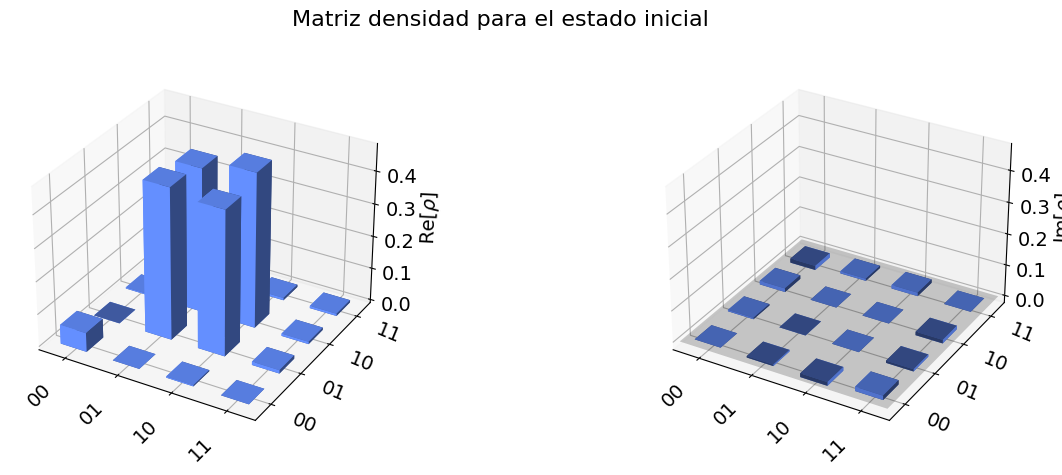

In [3]:
#Tomografía sobre los qubits del sistema A y B
st=StateTomography(q1,measurement_qubits=[1,2])
data = st.run(backend).block_for_results()
plot_state_city(data.analysis_results("state").value, title='Matriz densidad para el estado inicial')

/tmp/ipykernel_23625/3977241444.py:2: DeprecationWarning: StateTomography.__init__ keyword argument measurement_qubits is deprecated and will be removed after Qiskit Experiments 0.5. It is now replaced with measurement_indices. 
  st=StateTomography(q2,measurement_qubits=[1,2])


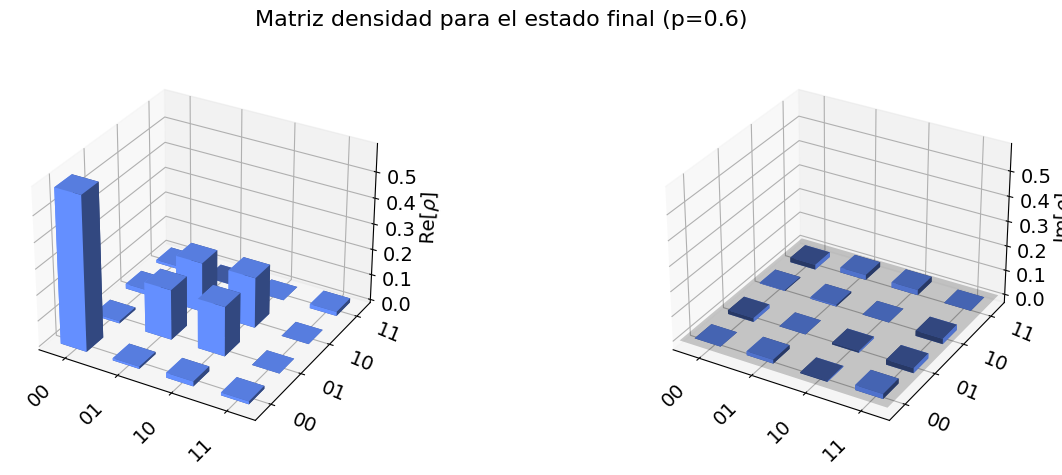

In [4]:
#Tomografía sobre los qubits del sistema A y B
st=StateTomography(q2,measurement_qubits=[1,2])
data = st.run(backend).block_for_results()
plot_state_city(data.analysis_results("state").value, title='Matriz densidad para el estado final (p=0.6)')

Como se observa el entorno influye en el estado del sistema inicial, eso se muestra en el histograma de la matriz densidad del sistema.